Álvaro Morán Errejón A01638034

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df.head()
#visualizaion de las primeras filas del dataset

In [ ]:
df.shape
#tamaño del dataset, comprobar que las filas>columnas

(607, 12)

In [ ]:
df.isnull().sum()
#comprobar que no falten variables (en esta ocasión no se observan valores faltantes)

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('work_year',axis=1,inplace=True)
df.drop('job_title',axis=1,inplace=True)
df.drop('salary_currency',axis=1,inplace=True)
df.drop('employee_residence',axis=1,inplace=True)
df.drop('company_location',axis=1,inplace=True)
df.drop('company_size',axis=1,inplace=True)
df.head()
#eliminar lasa columnas que no son necesarias para nuestro análisis y modelo

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50


In [ ]:
print(df['experience_level'].unique())
print(df['employment_type'].unique())
#ver el valor que puede tenter cada una de estas columnas

['MI' 'SE' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']


In [ ]:
dummies=pd.get_dummies(df['experience_level'], prefix='experience_level')
dummies2=pd.get_dummies(df['employment_type'], prefix='employment_type')
#convertir en dummies a estas dos columnas (0s y 1s) para poder trabajar con estas variables

In [ ]:
df=pd.concat([df,dummies],axis=1)
df=pd.concat([df,dummies2],axis=1)
#agregar a nuestro dataset estas nuevas columnas

In [ ]:
df.head()
#visualizar nuestro nuevo dataset

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,SE,FT,260000,260000,0,0,0,0,1,0,0,1,0
2,SE,FT,85000,109024,50,0,0,0,1,0,0,1,0
3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,SE,FT,150000,150000,50,0,0,0,1,0,0,1,0


In [ ]:
df.drop('experience_level',axis=1,inplace=True)
df.drop('employment_type',axis=1,inplace=True)
#eliminar las columnas que convertimos a dummmies porque ya no las necesitamos

A continuacion vemos si existen correlaciones entre columnas y de ser asi el caso tenemos que estandarizar los datos.

In [ ]:
correlacion=df.corr()

In [ ]:
correlacion

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
salary,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
experience_level_EN,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
experience_level_EX,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
experience_level_MI,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
experience_level_SE,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
employment_type_CT,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541
employment_type_FT,0.025685,0.091819,-0.023834,-0.167828,-0.008698,-0.006597,0.128381,-0.506989,-0.453089,1.000000,-0.719987


In [ ]:
alta_corr=np.where((correlacion>0.95)&(correlacion<1))
alta_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
baja_corr=np.where((correlacion<-0.95)&(correlacion>-1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Como no nos salieron variables con baja ni alta correlacion podemos concluir que las variables regresoras son independientes y entonces no tenemos que estandarizar.

AUN ASI VOY A ESTANDARIZAR LAS VARIABLES POR CONVENCIA DADO QUE EL RESULTADO DEBERIA SER EL MISMO

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df_estandar =scaler.fit_transform(df)

In [ ]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [ ]:
df_estandar

,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,-0.164605,-0.457904,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
1,-0.041475,2.083282,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
2,-0.154885,-0.046177,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
3,-0.197008,-1.301826,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
4,-0.112761,0.531774,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...
602,-0.110169,0.588192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
603,-0.128314,0.193263,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
604,-0.126370,0.235577,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
605,-0.112761,0.531774,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423


a continuacion haremos nuesto modelo usando un test size del 20%. Lo que hace el codigo es separar los datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df, test_size=0.20, random_state=42)

a continuacion usamos la biblioteca statsmodels para realizar un análisis de regresión lineal. El objetivo es predecir el salario en dolares. Usamos model.summary para obtener varias métricas y estadísticas relacionadas con el ajuste del modelo. las metricas clave que vamos a interpretar son Calculo de R^2, calculo de los coeficientes de regresión y p-valor;

In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula='salary_in_usd~salary+remote_ratio+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT+employment_type_FL+employment_type_FT',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        04:18:58   Log-Likelihood:                -6044.0
No. Observations:                 485   AIC:                         1.211e+04
Df Residuals:                     476   BIC:                         1.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.787e+04   2

Podemos ver que el calculo de R^2 es muy bajo(.264), lo cual es malo porque un valor cercano a 1 indica que el modelo se ajusta bien a los datos. (este non es el caso aqui)
los coeficientes de regresion ayudan a ver cómo el valor medio de la variable que queremos predecir (salary_in_usd) cambia cuando hay un cambio en cada una de las variables regresoras, manteniendo todas las demás variables constantes.

por ultimo el p valor nos ayuda a determinar si rechazamos o no la hipotesis nula. El valor de p tiene que ser menor a 0.05 para rechazar la hipotesis. En este caso solamente el salario, las variables de experience level y el employment_type_CT  son menor a 0.05 y son las variables que utilizaremos para y_pred



In [ ]:
#import statsmodels.formula.api as smf
#modelo = smf.ols(formula='salary_in_usd~salary+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT',data=entrenamiento)
#modelo=modelo.fit()
#print(modelo.summary())

En este modelo eliminamos las variables mayores a 0.05 en el p valor para ver si mejoraba nuestro modelo, pero una vez corriendolo la r^2 salio aun mas baja entonces nos quedamos con el modelo anterior

In [ ]:
y_aprox=-0.1455*prueba['salary'] + 0.049*prueba['employment_type_CT'] + 0.1902*prueba['experience_level_EX'] - 0.3717*prueba['experience_level_EN'] - 0.3225*prueba['experience_level_MI']

en esta linea usamos los datos de prueba para probar nuestro modelo y sacar las predicciones una vez que ya lo entrenamos

In [ ]:
y_aprox

563   -20406.3750
289   -19642.5000
76    -14550.3225
78    -39285.2735
182    -3201.3225
          ...    
249   -24735.0000
365   -20166.3000
453   -17460.3225
548   -14411.7750
235   -16005.3225
Length: 122, dtype: float64

In [ ]:
tabla=pd.DataFrame({'Real':prueba['salary_in_usd'],'Prediccion':y_aprox, 'Errores':prueba['salary_in_usd']-y_aprox})

In [ ]:
tabla

,Real,Prediccion,Errores
563,140250,-20406.3750,160656.3750
289,135000,-19642.5000,154642.5000
76,100000,-14550.3225,114550.3225
78,270000,-39285.2735,309285.2735
182,26005,-3201.3225,29206.3225
...,...,...,...
249,170000,-24735.0000,194735.0000
365,138600,-20166.3000,158766.3000
453,120000,-17460.3225,137460.3225
548,99050,-14411.7750,113461.7750


Creamos una "tabla" con tres columnas: "Real", "Prediccion" y "Errores". Comparamos los valores reales de la variable salary_in_usd con las predicciones (y_aprox) y calculando los errores al restar las predicciones de los valores reales. Se puede ver como el modelo no es accurate

Text(0, 0.5, 'prediccion')

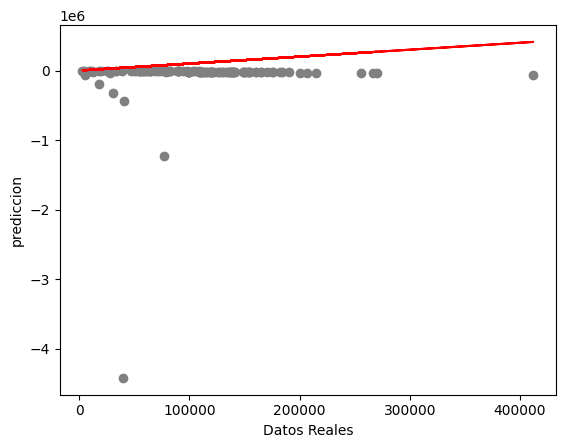

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['salary_in_usd'], y_aprox, color='gray')
plt.plot(prueba['salary_in_usd'], prueba['salary_in_usd'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("prediccion")

esta grafica de scatter plot nos ayuda a visualisar los datos reales contra los datos de prediccion. Llegamos a la conclusion de que se rechaza el modelo

In [ ]:
residuos = len(tabla['Errores'])

Text(0, 0.5, 'valor del residuo')

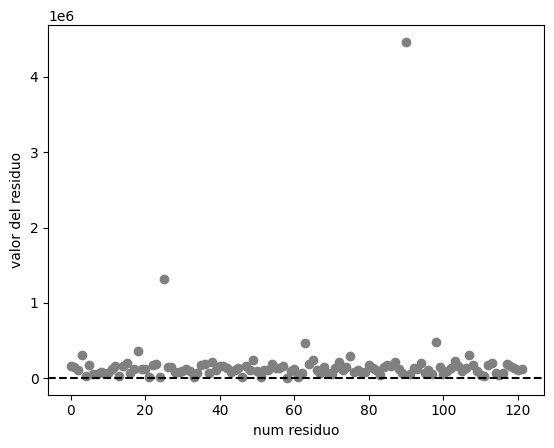

In [ ]:
plt.scatter(range(residuos), tabla['Errores'], color= 'gray')
plt.axhline(y=0, linestyle='--', color='black')
plt.xlabel("num residuo")
plt.ylabel("valor del residuo")

Aqui hacemos un gráfico de dispersión de los residuos (errores) en función del número de residuo para visualizar cómo los errores varían en relación con el orden de las observaciones. Como la mayoría de los puntos en el gráfico de residuos están fuera de la línea punteada podemos decir que el modelo no esta funcionando bien

Text(0, 0.5, 'frecuencia')

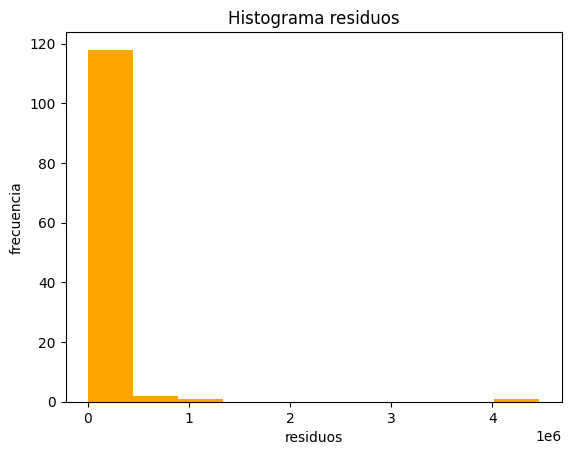

In [ ]:
plt.hist(x=tabla['Errores'], color= 'orange')
plt.title("Histograma residuos")
plt.xlabel("residuos")
plt.ylabel("frecuencia")

Esta grafica es un histograma que nos ayuda a visualizar como se distribuyen los residuos. Dado que el histograma se concentra entre -1 y 1 se pudiera pensar que el modelo es bueno pero cabe recordar que estandarizamos los datos lo cual significa que como el rango de la variable de prediccion es pequeño, se requieren errores aún más pequeños para considerar el modelo exitoso. lo mismo se debe de tomar en cuenta para la grafica anterior de residuos.

In [ ]:
media=tabla['Errores'].mean()
std=tabla['Errores'].std()
Errores_est=(tabla['Errores']-media)/std

aqui calculamos la media y la desviación estándar de los errores y estandarizamos los datos de la columna errores de la tabla que creamos anteriormente para poder analizarlos de mejor manera

In [ ]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.36852222348217545, pvalue=2.2792305106319163e-15, statistic_location=0.10374424225751223, statistic_sign=1)

Aqui realizamos una prueba de bondad de ajuste Kolmogorov-Smirnov (K-S) para evaluar si los errores estandarizados (Errores_est) siguen una distribución normal. dado que el valor de statistic es pequeño y el pvalor es relativamente alto se puede decir que si siguen una distribucion normal.

### Conclusion

Como conclusion debemos reflexionar porque el modelo salio así y porque las variables regresoras no nos ayudaron a predecir la variable de salary_in_usd. Yo creo que la razon principal es por la relacion entre la variable salary y la variable salay_in_usd. Al no tomar en cuenta el tipo de cambio la variable de salary lo unico que hace es empeorar nuestro modelo porque no estamos tomando en cuenta que moneda se esta usando. Las otras variables regresoras si son variables adecuadas para construir un modelo, y estoy seguro que quitando la variable de salary pduieramos tener un mucho mejor modelo de regresión lineal. Puderiamos remplazar la variable de salary con  la variable de company location para obtener un mejor modelo. Obviamente otra opcion sería incluir la variable de salary_currency pero incluyendo esa variable junto con la de salary entonces no tuvieramos porque hacer un modelo de predicción ya que esas dos variables solas nos darían siempre la predicción correcta de nuestro variable y. A continuacion dejo un codigo mostrando como difieren los salarios en unas filas y como en otras filas no difieren haciendolo una variable inutil.

In [ ]:
df['difference'] = abs(df['salary'] - df['salary_in_usd'])

sorted_df = df.sort_values(by='difference', ascending=False)

top_differences_high = sorted_df[['salary', 'salary_in_usd', 'difference']].head(10)
print("Top 10 differences (high salary in USD):")
print(top_differences_high)

bottom_differences_low = sorted_df[['salary', 'salary_in_usd', 'difference']].tail(10)
print("\nBottom 10 differences (low salary in USD):")
print(bottom_differences_low)

Top 10 differences (high salary in USD):
       salary  salary_in_usd  difference
177  30400000          40038    30359962
7    11000000          35735    10964265
102  11000000          36259    10963741
137   8500000          77364     8422636
136   7000000          63711     6936289
285   7000000          94665     6905335
384   6000000          79039     5920961
263   4900000          66265     4833735
16    4450000          41689     4408311
198   4000000          54094     3945906

Bottom 10 differences (low salary in USD):
     salary  salary_in_usd  difference
289  135000         135000           0
287  109000         109000           0
284   69999          69999           0
283  105000         105000           0
281  100000         100000           0
280  112000         112000           0
277   55000          55000           0
276   58000          58000           0
275  100000         100000           0
606  200000         200000           0


### Álvaro Moran Errejon A01638034